<a href="https://colab.research.google.com/github/Herais/MicrobialAnalysis/blob/main/MBA_frequentItemSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare environment

In [ ]:
import gdown
import os
import pickle

from google.colab import files

import pandas as pd
import numpy as np

import re
import gc

import itertools
from itertools import zip_longest
from collections import Counter
from collections import OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns

import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D

import networkx as nx
import random
import math

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("pandas version: {}".format(pd.__version__))
print("mlxtend verions: {}".format(mlxtend.__version__))
!which python

pandas version: 1.5.3
mlxtend verions: 0.22.0
/usr/local/bin/python


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Import data

In [ ]:
fp_data_ccsf = '/content/OTU_CF-soil_particle.csv'
id_file_ccsf = '1gc66lzz7kalmgmPaGxx5coDkT1H58YuA'
gdown.download(id=id_file_ccsf, output=fp_data_ccsf, quiet=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'/content/OTU_CF-soil_particle.csv'

In [ ]:
fp_data_all = '/content/all_otu_counts.ssp.csv'
id_file_all = '1YfT1oJD9ZVZk81Q_XQPzm1NifftslRna'
gdown.download(id=id_file_all, output=fp_data_all, quiet=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'/content/all_otu_counts.ssp.csv'

In [ ]:
df_all = pd.read_csv(fp_data_all)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Preprocess for market basket analysis

In [ ]:
df_all['site'] = df_all['Unnamed: 0'].apply(lambda x: x[:2])
df_all['site'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['CF', 'HB', 'KB', 'Pn', 'UB', 'UF', 'WM'], dtype=object)

In [ ]:
SITE = 'UF'
df = df_all #[df_all['site'] == SITE].copy()
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Otu1,Otu73,Otu4749,Otu49,Otu5592,Otu267,Otu258,Otu2144,Otu502,...,Otu11014,Otu12161,Otu13263,Otu11662,Otu13210,Otu11688,Otu13137,Otu10981,Otu11673,site
0,CF100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CF
1,CF101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CF
2,CF102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CF
3,CF103,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CF
4,CF104,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,WM96,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,WM
4045,WM95,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,WM
4046,WM97,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,WM
4047,WM98,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,WM


In [ ]:
cols = df.columns
cols = [col for col in cols if not re.search('Unnamed: 0|site', col)]
cols = sorted(cols, key=lambda x: int(x[3:]))

# assign presence/absence
dft = df[cols].gt(0, axis=0)
dft = dft.astype('int')

n_cooccur_max = dft.to_numpy().sum(axis=1).max()
print(n_cooccur_max)
dft

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


163


,Otu1,Otu2,Otu3,Otu4,Otu5,Otu6,Otu7,Otu8,Otu9,Otu10,...,Otu13290,Otu13291,Otu13292,Otu13293,Otu13294,Otu13295,Otu13296,Otu13297,Otu13298,Otu13299
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# only keep events that has at least one assigned otu
df_filtered =  dft[dft[cols].apply(sum, axis=1) > 0].copy()
df_filtered['sid'] = df_all['Unnamed: 0']

print('# of events: {}'.format(df.shape[0]))
#print('# of events after filtering by sample gt 1 OTU: {}'.format(df_filtered.shape[0]))

# drop all Otu without any events
print('# of OTU: {}'.format(df_filtered.shape[1] -1))

tmp = df_filtered[cols].apply(sum, axis=0) > 0
col_filtered = list(tmp[tmp].index)

df_filtered = df_filtered[['sid'] + col_filtered]
print('# of OTU after filtering for OTU with events: {}'.format(df_filtered.shape[1] -1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# of events: 4049
# of OTU: 13299
# of OTU after filtering for OTU with events: 1096


In [ ]:
df_filtered

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sid,Otu1,Otu2,Otu3,Otu4,Otu5,Otu7,Otu8,Otu9,Otu10,...,Otu12867,Otu12871,Otu12941,Otu12954,Otu12957,Otu12985,Otu13141,Otu13153,Otu13224,Otu13297
0,CF100,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CF101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CF102,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CF103,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CF104,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,WM96,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4045,WM95,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4046,WM97,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4047,WM98,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
del tmp
gc.collect()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


152

https://towardsdatascience.com/data-mining-market-basket-analysis-with-apriori-algorithm-970ff256a92c

In [ ]:
transactions = df_filtered.iloc[:,1:]
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Otu1,Otu2,Otu3,Otu4,Otu5,Otu7,Otu8,Otu9,Otu10,Otu11,...,Otu12867,Otu12871,Otu12941,Otu12954,Otu12957,Otu12985,Otu13141,Otu13153,Otu13224,Otu13297
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
a_otu = np.array(list(transactions.columns))
basket = transactions.astype('bool').apply(lambda x: a_otu[x], axis=1)
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       [Otu4, Otu13, Otu280, Otu1459, Otu1573, Otu234...
1       [Otu13, Otu280, Otu1459, Otu1573, Otu2342, Otu...
2       [Otu4, Otu8, Otu280, Otu373, Otu1314, Otu1459,...
3       [Otu176, Otu280, Otu1459, Otu1573, Otu2342, Ot...
4            [Otu13, Otu1459, Otu2342, Otu7728, Otu10784]
                              ...                        
4044    [Otu11, Otu19, Otu22, Otu55, Otu76, Otu86, Otu...
4045                                            [Otu1828]
4046                   [Otu97, Otu1828, Otu2284, Otu7254]
4047                            [Otu97, Otu2284, Otu4348]
4048                                     [Otu97, Otu2284]
Length: 4049, dtype: object

# Apriori Algorithm

[Wikipedia: Association Rule Learning](https://en.wikipedia.org/wiki/Association_rule_learning)

Association Rule: Ex. {X → Y} is a representation of finding Y on the basket which has X on it
Itemset: Ex. {X,Y} is a representation of the list of all items which form the association rule
Support: Fraction of transactions containing the itemset
Confidence: Probability of occurrence of {Y} given {X} is present
Lift: Ratio of confidence to baseline probability of occurrence of {Y}

Conviction - another way to measure association, which compares the probability that A appears without B if they were independent vs the actual frequency of A's appearance without B. Conviction(A→B) = (1 - Support(B)) / (1 - Confidence(A→B))

In [ ]:
SUPPORT_MIN = 0.12
LIFT_MIN = 2
CONFIDENCE_MIN = 0
LEN_COMBO_MAX = 0 # examine all

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets = apriori(transactions,
                            min_support= SUPPORT_MIN,
                            use_colnames=True,
                            max_len = LEN_COMBO_MAX,
                            #low_memory=True, # only set to true if the session crashes
                           )
rules = association_rules(frequent_itemsets,
                          metric="lift",  #confidence
                          min_threshold = LIFT_MIN)
display(rules.head())
print("Rules identified: ", len(rules))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Otu3),(Otu2),0.303285,0.273154,0.199308,0.657166,2.405846,0.116465,2.120112,0.838715
1,(Otu2),(Otu3),0.273154,0.303285,0.199308,0.729656,2.405846,0.116465,2.577147,0.803947
2,(Otu2),(Otu8),0.273154,0.400099,0.227464,0.832731,2.081312,0.118175,3.586436,0.714778
3,(Otu8),(Otu2),0.400099,0.273154,0.227464,0.568519,2.081312,0.118175,1.684536,0.866032
4,(Otu2),(Otu15),0.273154,0.249938,0.175352,0.641953,2.568446,0.107080,2.094869,0.840150


Rules identified:  610398


In [ ]:
rules_sorted = rules.sort_values(['lift', 'confidence', 'zhangs_metric', 'zhangs_metric'],
                  ascending=[False, False, False, False]).reset_index(drop=True)

rules_sorted['combo'] = rules_sorted\
    .apply(lambda x: frozenset().union(*[x['antecedents'], x['consequents']]), axis=1)\
    .apply(lambda x: tuple(sorted(x)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Inter-combo variation

In [ ]:
# Calculate standard deviation on the confidence of the rules for each combo.
# The greater std, the more likely there is a directional inference

combo_ordered_by_std = rules_sorted.groupby('combo')['confidence'].std().rename('std').sort_values(ascending=False).reset_index()
combo_ordered_by_std

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,combo,std
0,"(Otu782, Otu97)",0.465059
1,"(Otu86, Otu97)",0.465059
2,"(Otu9523, Otu97)",0.465059
3,"(Otu11, Otu97)",0.382926
4,"(Otu2284, Otu97)",0.285992
5,"(Otu11, Otu1828, Otu97)",0.265465
6,"(Otu11, Otu782, Otu97)",0.264161
7,"(Otu11, Otu9523, Otu97)",0.263954
8,"(Otu11, Otu6755)",0.197990
9,"(Otu11, Otu9523)",0.141421


In [ ]:
df1 = rules_sorted.merge(combo_ordered_by_std, on='combo', how='left').copy()
df1.sort_values(['std', 'combo', 'lift', 'confidence',], ascending=[False, True, False, False]).head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,combo,std
29,(Otu97),(Otu782),0.380117,0.116959,0.111111,0.292308,2.499231,0.066653,1.247775,0.967726,"(Otu782, Otu97)",0.465059
33,(Otu782),(Otu97),0.116959,0.380117,0.111111,0.950000,2.499231,0.066653,12.397661,0.679331,"(Otu782, Otu97)",0.465059
28,(Otu97),(Otu86),0.380117,0.116959,0.111111,0.292308,2.499231,0.066653,1.247775,0.967726,"(Otu86, Otu97)",0.465059
32,(Otu86),(Otu97),0.116959,0.380117,0.111111,0.950000,2.499231,0.066653,12.397661,0.679331,"(Otu86, Otu97)",0.465059
30,(Otu97),(Otu9523),0.380117,0.116959,0.111111,0.292308,2.499231,0.066653,1.247775,0.967726,"(Otu9523, Otu97)",0.465059
34,(Otu9523),(Otu97),0.116959,0.380117,0.111111,0.950000,2.499231,0.066653,12.397661,0.679331,"(Otu9523, Otu97)",0.465059
40,(Otu11),(Otu97),0.146199,0.380117,0.128655,0.880000,2.315077,0.073082,5.165692,0.665318,"(Otu11, Otu97)",0.382926
41,(Otu97),(Otu11),0.380117,0.146199,0.128655,0.338462,2.315077,0.073082,1.290630,0.916381,"(Otu11, Otu97)",0.382926
26,(Otu2284),(Otu97),0.222222,0.380117,0.216374,0.973684,2.561538,0.131904,23.555556,0.783784,"(Otu2284, Otu97)",0.285992
27,(Otu97),(Otu2284),0.380117,0.222222,0.216374,0.569231,2.561538,0.131904,1.805556,0.983427,"(Otu2284, Otu97)",0.285992


In [ ]:
# prompt: mount google drive
from google.colab import drive
drive.mount('/content/drive')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


In [ ]:
fp = '/MBA_output_support{}_lift{}_maxlen{}_site{}.csv'.format(
    SUPPORT_MIN, LIFT_MIN, LEN_COMBO_MAX, SITE
)
df1.to_csv(fp)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
files.download(fp)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Plot 3D distribution

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


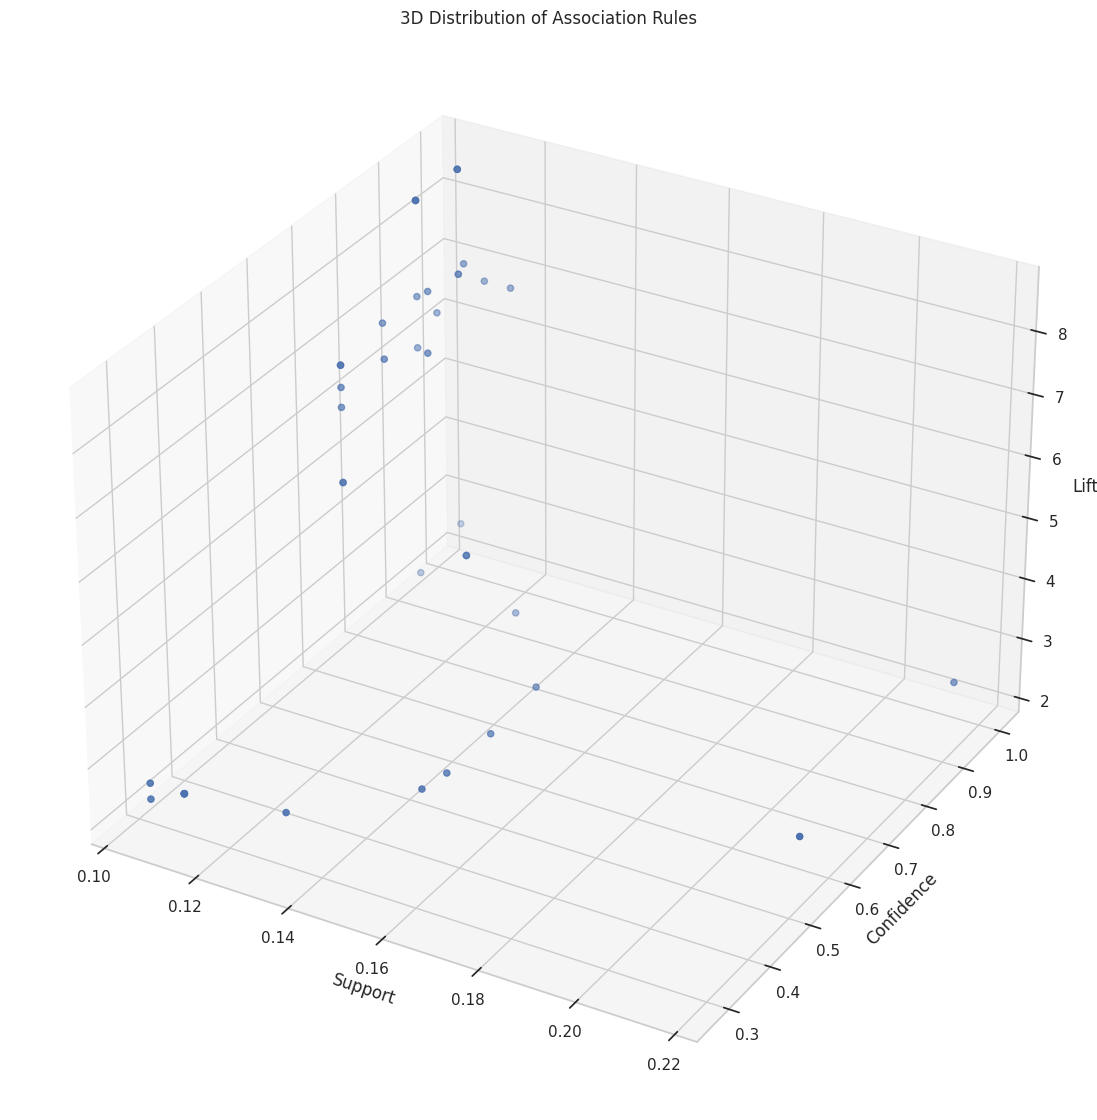

In [ ]:
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(projection = '3d')


x = rules_sorted['support']
y = rules_sorted['confidence']
z = rules_sorted['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

# Plot Network

In [ ]:
def draw_network(
    rules,
    rules_to_show,
    draw=True,
):
  # Directional Graph from NetworkX
  network = nx.DiGraph()

  # Loop through number of rules to show
  for i in range(rules_to_show):

    # Add a Rule Node
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']:
        # Add antecedent node and link to rule
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)

    for consequents in rules.iloc[i]['consequents']:
        # Add consequent node and link to rule
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]

  # For every node, if it's a rule, colour as Black, otherwise Orange
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')

  # Position nodes using spring layout
  pos = nx.spring_layout(network, k=16, scale=1)

  # Draw the network graph
  if draw:
      nx.draw(network, pos, node_color = color_map, font_size=8)

      # Shift the text position upwards
      for p in pos:
          pos[p][1] += 0.12

      nx.draw_networkx_labels(network, pos)
      plt.title("Network Graph for Association Rules")
      plt.show()

  return network

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:28: DeprecationWarning: invalid escape sequence '\d'
<>:28: DeprecationWarning: invalid escape sequence '\d'
<ipython-input-36-c906b908efc1>:28: DeprecationWarning: invalid escape sequence '\d'
  if re.compile("^[R]\d+$").fullmatch(node) != None:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


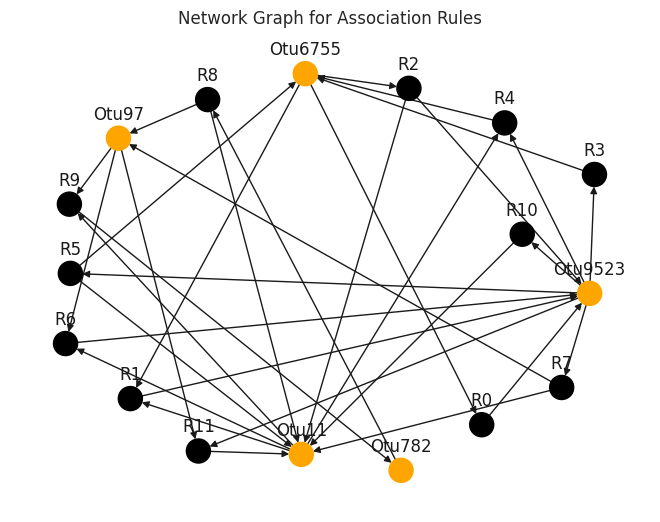

In [ ]:
NUM_NODES = 12
network = draw_network(rules_sorted, NUM_NODES)

In [ ]:
# generate adjacency matrix from network
network_allnodes = draw_network(rules_sorted, rules_sorted.shape[0], draw=False)

#nx.to_pandas_adjacency(network_allnodes)

# generate edgelist from network
count_nrule2target = nx.to_pandas_edgelist(network_allnodes).groupby('target')['source'].count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
count_nrule2target.sort_values(ascending=False).rename('n_rules').to_frame()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,n_rules
target,
Otu11,15
Otu97,13
Otu9523,9
Otu6755,5
Otu782,5
Otu1828,4
R18,2
R6,2
R42,2


In [ ]:
# calcualte the number of antecedents to each consequent
rules.groupby('consequents')['antecedents'].count().sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


consequents
(Otu11)               8
(Otu97)               8
(Otu9523)             5
(Otu782)              3
(Otu6755)             3
(Otu97, Otu11)        2
(Otu11, Otu9523)      2
(Otu1828, Otu11)      1
(Otu86)               1
(Otu2284)             1
(Otu782, Otu11)       1
(Otu782, Otu97)       1
(Otu1828, Otu7254)    1
(Otu1828, Otu97)      1
(Otu97, Otu9523)      1
(Otu6755, Otu9523)    1
(Otu6755, Otu11)      1
(Otu7254)             1
(Otu4514)             1
(Otu4514, Otu1828)    1
Name: antecedents, dtype: int64

# Look at filtered groups

In [ ]:
rules_selected = rules_sorted[(rules_sorted['support'] >= 0.16) &
             (rules_sorted['lift'] >= 4.4) &
             (rules_sorted['lift'] < 5)
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


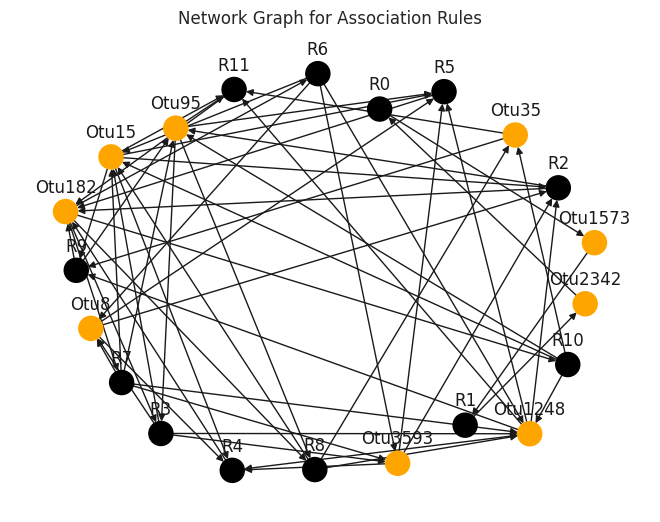

In [ ]:
network_selected = draw_network(rules_selected , NUM_NODES)